<a href="https://colab.research.google.com/github/srt3264/Bowling/blob/main/Methods_Module_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Methods Module 1

Welcome to the first (totally optional) methods module for People Analytics! First, some information about methods modules in general.

## General Procedure

Google Colab Notebooks are made up of text cells (like this one) and code cells (the cell below this one). Text cells are meant to provide a narrative of what we're currently doing in the notebook, and you should read what they have to say. Code cells, on the other hand, are what make Colab Notebooks so cool (or, well, you know, cool to nerds anyways).

Code cells contain [Python](https://en.wikipedia.org/wiki/Python_(programming_language)) code, which can be run on Google's servers for free if you have a Google account (which, by the way, you have through Stanford). If you hover over the code cell below, a "play" button will appear. If you click on that, the code will run and results will show up just below it. Welcome to Google Colab!

In [1]:
print("Hello world!")

Hello world!


In [2]:
((9 * 11) + 1)/2

50.0

Now, this module is broken up into two major parts. The first is the "guided" section, which goes from the "Importing Libraries" section through the "Gathering Data" section (click the "Table of contents" button on the sidebar of this notebook to see the outline of the module and jump to specific sections). The second part is the "Your Turn!" section, which is near the end of the module.

During the guided section, I'll provide a whole bunch of code and narrative explaining what the code is doing. This will be the main way you will learn during this module: following along with what I'm doing, seeing how it is done in Python, and looking at the results produced by the analyses I do. In this section, there will also be a few questions, typically just asking you to interpret a data visualization I just made, do a basic calculation using a formula provided, or recall someting from lecture. Be sure to answer these if you want full credit. To double-check that you've answered all the questions in the guided section, you can hit Ctrl+F and search for "QUESTION (!!)".

During the "Your Turn!" section, I'll pose a series of more open-ended problems for you to complete. These will require you to do some coding. However, I've specifically designed the problems and the code in the guided section such that 90% of the coding work will be copy-and-pasting code from the guided section. Parts of the problems will also ask you to interpret your own results.

**IMPORTANT**: If you see cells that say "X cells hidden", BE SURE TO CLICK ON THOSE. This is a way for Google Colab to make notebooks more condensed, but if you don't open these up you might miss something important, such as code that will be helpful for the "Your turn!" section or questions you need to answer to receive credit!

## Goals

The goal of this methods module are as follows:
1.   Give you **hands-on experience** with machine learning algorithms implemented in Python, an open-source programming language used by actual practicioners in the field of People Analytics.
2.   Give you the opportunity to **learn more** about the technical details of ML algorithms we'll discuss in class.

This exercise is graded on completion. In other words, **make sure you don't miss any questions or parts of any of the problems, as this will result in you not getting any credit for the entire module**.


## Big Disclaimers

1.  There are many, many, many different ML algorithms out there, and new ones are being developed all the time. We're just covering a few foundational ones.
2.   One of the basic things you should learn to do before attempting real-world, applied machine learning is [cross-validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)). This involves systematically testing out various values of hyperparameter on your training set so that you give your algorithm the best chance possible to predict the test set well. We're not going to cover this at all in this module.
3.   Most of the time, there are "tricks of the trade" that can increase the performance of ML algorithms. For instance, [standardization](https://en.wikipedia.org/wiki/Standard_score) (that it, arithmetically manipulating variable values so that their mean is zero and their standard deviation is one), [adaptive boosting](https://en.wikipedia.org/wiki/AdaBoost) (training an ordered sequence of algorithms that learn to predict the previous algorithm's mistakes), and [dropout](https://en.wikipedia.org/wiki/Dilution_(neural_networks)) (a way of introducing noise into training) can all help increase performance in real settings under certain conditions. We're not going to cover any of those tricks here.
4.   The code provided here is meant to emphasize readability over efficiency and elegance. In other words, there are "better" ways to write this code (e.g., such that it runs faster and is more concise/less repetitive).


## Turning in

Details for how to turn in methods modules are at the bottom, but you should be turning in both a .pdf file and a .ipynb file to Canvas. Look over the section at the end and follow the instructions carefully to be sure you receive credit for your work.

Now that we've talked about methods modules in general, let's talk about this specific methods module, which is on **machine learning** (or ML). As you learned in the readings and lecture, ML is essentially the practice of *building algorithms that learn to recognize and predict patterns in data*. In this module, you're going to learn about and work with two algorithms used by folks in people analytics: (1) artifical neural networks and (2) random forests. Let's get started!



# Importing Libraries

Python (the programming language our code will be in) is a really powerful tool because it is extremely flexible; you can do just about anything with it. Part of its flexibility comes from using really simple building blocks, including very general data structures (e.g. "strings" or text, "lists" or ordered collections of other objects, and "dictionaries" or collections of key-value pairings) and logical operations (e.g. "and" ["A and B" is true iff "A" is true while "B" is also true] and "or" ["A or B" is false iff "A" is false while "B" is also false]. The tradeoff of this flexibility is that it can be very painful to build complicated algorithms "from scatch".

Luckily, other folks have already done this work, and entire communities of people double-check their work and maintain Python **libraries** that are freely available and open-source. In other words, instead of needing to write all the code for building a neural network ourselves, we can download shortcuts other people have made which will allow us to use their implementation of a neural network with just a couple lines of code!

The use of libraries is indispensable for anyone in data science or machine learning, but using them comes with some serious costs. First, you need to make sure you are using reliable libraries, since **anyone** could write a library and make it available. Before using a library in high-stakes settings (e.g., scientific publication or making important business decisions), you would ideally look into the source code for a library and make sure you generally understand/agree with their implementation. That's not feasible for most, so you should definitely make sure you at least test the implementation on simple examples you can manually check and try to confirm that the libraries you are using are reputable.

A second tradeoff with using libraries is that learning to effectively leverage the code in a library can be like learning an entire other programming language unto itself. Libraries often go through updates, meaning that what worked two weeks ago might not work any more. This can be a big cost, but it is worth noting that those who maintain libraries generally try to reduce these costs by (a) having a logic to how to use their libary, such that once you understand that logic learning new commands should be fairly striaght-forward and (b) keeping the underlying logic and the specific commands as stable as possible.

Alright, so given that introduction, let's download some libraries for us to use!

In [3]:
# Good for basic numerical operations and random number generation
import numpy as np

# Good for working with datasets
import pandas as pd

# Good for data visualization (I also like Seaborn)
import matplotlib.pyplot as plt

# Good for machine learning
import sklearn
import sklearn.neural_network
import sklearn.ensemble
import sklearn.datasets

# Efficiently loops over combinatorials of lists
import itertools

# Generating data

In most of the guided part of this methods module, we'll be using **synthetic data**, or fake data that we'll create. Synthetic data typically has two components: (1) structure, or a relationship between features and outcome that we pre-specify and is deterministic; and (2) randomness, or "noise" that is generated by (as good as) random procedures that is added to the data. As you might expect, the more your data is characterized by the former as opposed to the latter, the easier it will be for ML algorithms to pick up patterns in your data. However, you can also vary how complicated the structure is in your data as well as how many observations are in your data.

Why use synthetic data? This will allow us to know exactly what the "right" answer is, to have no uncertainty about the quality of data, and to produce controlled conditions where we can test when different algorithms perform better or worse.

We're going to have four different synthetic datasets we're going to work with: (1) continuous outcome, simple structure; (2) continuous outcome, complex structure; (3) binary outcome, simple structure; and (4) binary outcome, complex structure.

Finally, for the purposes of being able to present these results easily, we're going to have only one feature for continuous outcomes, while we'll have only two features for the binary outcomes. In the real world you'll often have many more predictors, but this will help us keep things relatively simple and easy-to-follow.

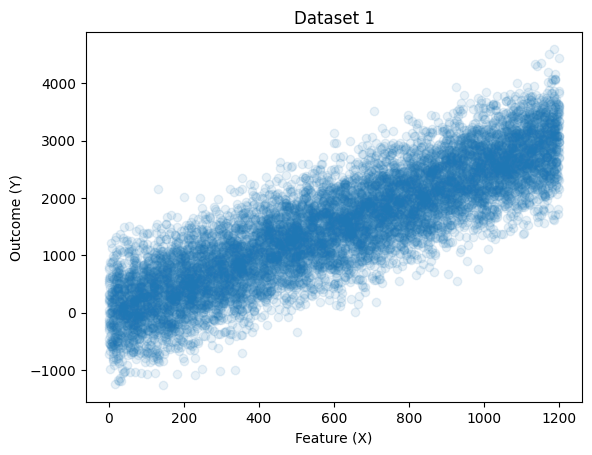

In [4]:
# Generate the first dataset...

# Set the random seed (so we all get the same results)
np.random.seed(8675309)

# Generate each observation's feature value at random
X = np.random.random(size=10000) * 1200

# Create the function (i.e., a coding shortcut) that deterministically outputs a
# X*B, where B is assumed to be 2.5 unless otherwise specified
def linear(x, B=2.5):
  return x*B

'''
Create a receptacle for our outcome values (right now this is an empty list,
but as we calculate what our Y values should be for each observation we'll
populate this list with those values)
'''
Y = []

# For each observation in the dataset...
for x in X:

    # Add our structure (2.5 * x)
    y = linear(x)

    # And then add randomness (normally distributed noise with a mean of zero
    # and a standard deviation of 500 units)
    y += np.random.normal(scale=500)

    # Add the outcome value to our dataset
    Y.append(y)

# Combine the feature and outcome values to a single, easy-to-work-with dataset
df1 = pd.DataFrame({"X": X, "Y": Y})

# Graph the data...

'''
This command produces a scatter plot of the two variables you put into it (drawn
from the dataframe we put in as the "data")
NOTE: "alpha" tells Python how transparent we want our scattered points to be.
Feel free to play with this and see how the graph changes!
'''
plt.scatter('X', 'Y', alpha=0.1, data=df1)

# These commands label the axes and the graph
plt.xlabel("Feature (X)")
plt.ylabel("Outcome (Y)")
plt.title("Dataset 1")

# This command tells Python to show the graph (it will still show it even if you
# don't put this command, but then there's an annoying/ugly user message)
plt.show()

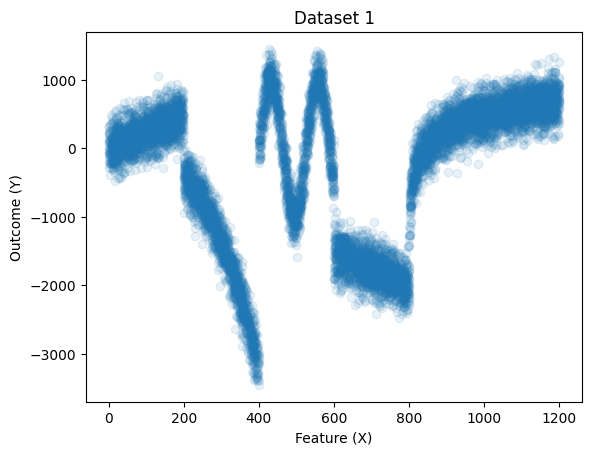

In [5]:
# Generate the second dataset...

# Set the random seed (so we all get the same results)
np.random.seed(8675309)

# Generate each observation's feature value at random
X = np.random.random(size=10000) * 1200

# Create the function that deterministically (but crazily) outputs a Y from
# a given X
def cray(x):
  if x < 200:
    return x * 2.5
  elif x < 400:
    return ((-5*x*x*x) + (2*x*x) + (3*x))/100000
  elif x < 600:
    return np.sin((x-400)/20) * 1000
  elif x < 800:
    return x * -2.5
  else:
    return np.log((x-799.99)/40) * 300

# Create a receptacle for our outcome values
Y = []

# For each observation in the dataset...
for x in X:

    # Add structure
    y = cray(x)

    # And then add randomness
    y += np.random.normal(scale=200)

    # Add the outcome value to our dataset
    Y.append(y)

# Combine the feature and outcome values to a single, easy-to-work-with dataset
df2 = pd.DataFrame({"X": X, "Y": Y})

# Graph the data (just like before but with df2 as the data source)
plt.scatter('X', 'Y', alpha=0.1, data=df2)
plt.xlabel("Feature (X)")
plt.ylabel("Outcome (Y)")
plt.title("Dataset 1")
plt.show()

<ipython-input-6-d80237738b26>:59: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in leg.legendHandles:


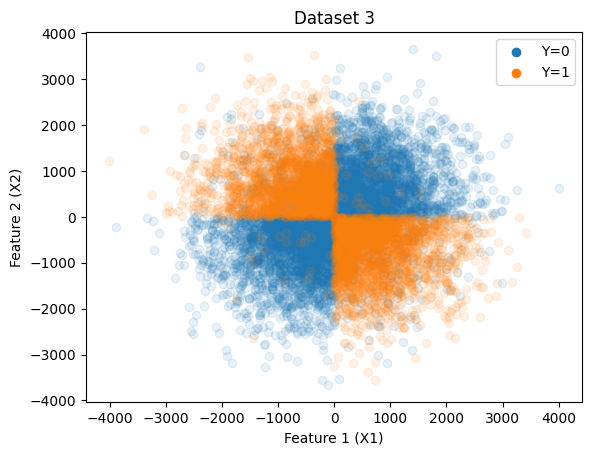

In [6]:
# Generate the third dataset...

# Set the random seed (so we all get the same results)
np.random.seed(8675309)

'''
Generate each observation's feature values at random. Since we have two features
here, we'll draw their random values from what's called a multivariate normal
distribution. It's not really imporant, but it' a simple distribution for
describing multiple variables at once. The "cov" parameter specifies the
covariance matrix between the two variables. The value we plug in here specifies
that the two variables should not be correlated at all and should each have
a standard deviation of sqrt(1000000).
'''
X1, X2 = np.random.multivariate_normal(mean=[0,0],
                                       cov=[[1000000, 0],[0, 1000000]],
                                       size=10000).T

# Create the function that outputs a prob(Y) from a given X
def simple(x1, x2):
  if x1 < 0 and x2 < 0:
    return 0.01
  elif x1 >= 0 and x2 >= 0:
    return 0.01
  else:
    return 0.9

# Create a receptacle for our outcome values
Y = []

# For each observation in the dataset...
for x1, x2 in zip(X1, X2):

    #Calculate the P(Y=1) given the features
    p = simple(x1, x2)

    # Given the probability that Y=1, select whether the obs is actually Y=1
    y = np.random.choice([0,1], p=[(1-p),p])

    # Add the outcome value to our dataset
    Y.append(y)

# Combine the feature and outcome values to a single, easy-to-work-with dataset
df3 = pd.DataFrame({"X1": X1, "X2": X2, "Y": Y})

#Graph the data...

# Scatterplot with blue dots being Y=0 and orange dots being Y=1
plt.scatter('X1', 'X2', alpha=0.1, label="Y=0", data=df3[df3.Y==0])
plt.scatter('X1', 'X2', alpha=0.1, label="Y=1", data=df3[df3.Y==1])

#Add labels
plt.xlabel("Feature 1 (X1)")
plt.ylabel("Feature 2 (X2)")
plt.title("Dataset 3")

#Add a legend (need to do some rigmarole so you can see the dots in the legend)
leg = plt.legend()
for lh in leg.legendHandles:
    lh.set_alpha(1)

<ipython-input-7-a06154108334>:59: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in leg.legendHandles:


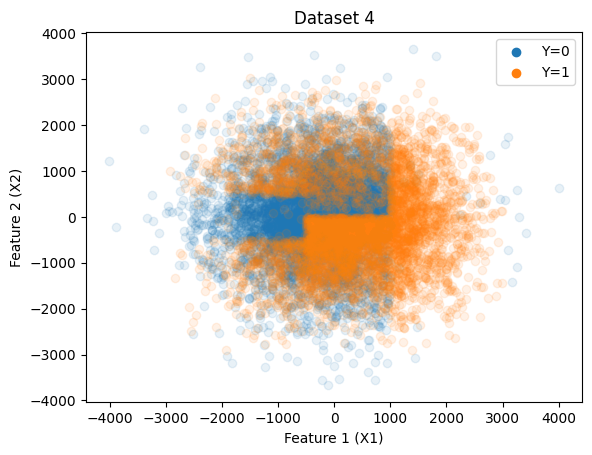

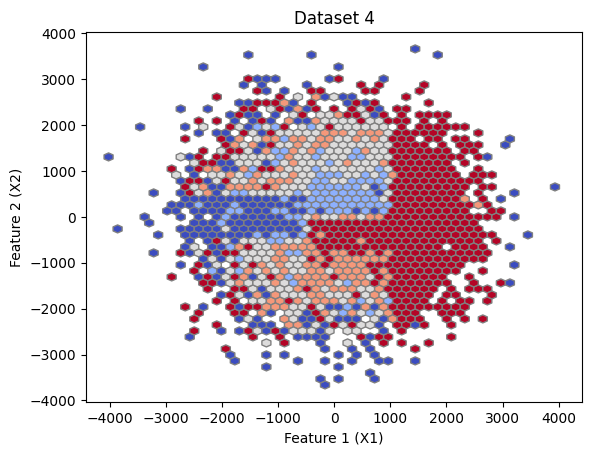

In [7]:
# Generate the fourth dataset...

# Set the random seed (so we all get the same results)
np.random.seed(8675309)

# Generate each observation's feature values at random
X1, X2 = np.random.multivariate_normal(mean=[0,0],
                                       cov=[[1000000, 0],[0, 1000000]],
                                       size=10000).T

# Create the (complicated) function that outputs a prob(Y) from a given X
def complex2D(x1, x2):
  if abs(x1) > 3000 or abs(x2) > 3000:
    return 0.01
  if x1 < -500 and x2 < -500:
    return 0.5
  elif x1 < -500 and x2 < 500:
    return 0.01
  elif x1 < -500:
    return 0.5
  elif x1 < 1000 and x2 < 0:
    return 1 - abs(x2)/3500
  elif x1 < 1000 and x2 >= 0:
    return x2/3500
  else:
    return 0.99

# Create a receptacle for our outcome values
Y = []

# For each observation in the dataset...
for x1, x2 in zip(X1, X2):

    #Calculate the P(Y=1) given the features
    p = complex2D(x1, x2)

    # Given the probability that Y=1, select whether the obs is actually Y=1
    y = np.random.choice([0,1], p=[(1-p),p])

    # Add the outcome value to our dataset
    Y.append(y)

# Combine the feature and outcome values to a single, easy-to-work-with dataset
df4 = pd.DataFrame({"X1": X1, "X2": X2, "Y": Y})

#Graph the data...

# Scatterplot with blue dots being Y=0 and orange dots being Y=1
plt.scatter('X1', 'X2', alpha=0.1, label="Y=0", data=df4[df4.Y==0])
plt.scatter('X1', 'X2', alpha=0.1, label="Y=1", data=df4[df4.Y==1])

#Add labels
plt.xlabel("Feature 1 (X1)")
plt.ylabel("Feature 2 (X2)")
plt.title("Dataset 4")

#Add a legend
leg = plt.legend()
for lh in leg.legendHandles:
    lh.set_alpha(1)

plt.show()

'''
Because this scatterplot can be difficult to decipher, I'm also producing a
hexbin plot, in which hexagonal areas on the graph will be colored based on
the average value of Y for points located in that area.
'''
plt.hexbin(df4.X1, df4.X2, C=df4.Y, gridsize=50,
           reduce_C_function=np.mean,
           bins=5, cmap="coolwarm", edgecolor="grey")
#Add labels
plt.xlabel("Feature 1 (X1)")
plt.ylabel("Feature 2 (X2)")
plt.title("Dataset 4")

plt.show()

# Generating a Training and Test Partition

Remember from class that when evaluating the quality of predictions, it's important to break your data into a **training set**, which you use to teach your algorithm patterns in the data, and a **test set**, that you use to evaluate how well your algorithm learned those patterns. This helps us avoid confusing over-fitting for real learning.

Below, we split our four datasets into training and test sets.

In [8]:
# So we all get the same results
np.random.seed(8675309)

'''
Although all the datasets were generated randomly, we'll first randomly shuffle
the data. In real data, you wouldn't want order in the data (e.g., executives
are listed first in your employement records) to affect your results.
'''
df1 = df1.sample(frac=1, replace=False)
df2 = df2.sample(frac=1, replace=False)
df3 = df3.sample(frac=1, replace=False)
df4 = df4.sample(frac=1, replace=False)

# Then we'll select what proportion of observations we want to put in our test
# set. This depends on a lot of factors but here we'll pick 10%
p_test = 0.1

'''
Now we'll take the top p_test% of rows for each dataset and put them into a
test set. The bottom 1-p_test% of rows will be put into a training set. In our
case, all the datasets have the same number of rows, but I'll still calcualte
this number seperately for each dataset.
'''

# For dataset 1...
n1 = round(len(df1) * p_test)
df1_test = df1.head(n1)
df1_train = df1.tail(-n1)

# For dataset 2...
n2 = round(len(df2) * p_test)
df2_test = df2.head(n2)
df2_train = df2.tail(-n2)

# For dataset 3...
n3 = round(len(df3) * p_test)
df3_test = df3.head(n3)
df3_train = df3.tail(-n3)

# For dataset 4...
n4 = round(len(df4) * p_test)
df4_test = df4.head(n4)
df4_train = df4.tail(-n4)

# The Limits of Prediction

To interpret how successful we ultimately are at predicting our outcome variables, it's helpful to have expected lower and upper bounds of predictability in a dataset. To measure the quality of predictions, we'll use [mean absolute error](https://en.wikipedia.org/wiki/Mean_absolute_error) (for continuous outcomes) and [accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision#In_binary_classification) (for binary outcomes).

Lower-bounds can be set for both real-world and synthetic datasets by using a very simple prediction function. For continuous outcomes this can be just predicting the mean of the training set for each observation in the test set (this is also called the "mean only" or "constant only" model). For binary outcomes, this can be predicting the most common outcome in the training set for the test set (or randomly guessing $Y=1$ at the rate at which observations have $Y =1$ in the training set).

In [9]:
# Lower-bound of predictability for dataset 1...

# Make guesses at the test sets' outcome values based only on the mean of the
# training set.
preds = [df1_train.Y.mean() for i in df1_test.Y]

# Calculate how predictive this is and print the results
mae = round(sklearn.metrics.mean_absolute_error(df1_test.Y, preds),3)
print("Lower-bound DS1: {}".format(mae))

# Lower-bound of predictability for dataset 2...

# Make guesses at the test sets' outcome values based only on the mean of the
# training set.
preds = [df2_train.Y.mean() for i in df2_test.Y]

# Calculate how predictive this is and print the results
mae = round(sklearn.metrics.mean_absolute_error(df2_test.Y, preds),3)
print("Lower-bound DS2: {}".format(mae))

# Lower-bound of predictability for dataset 3...

# Make guesses at the test sets' outcome values based only on the most common
# outcome in the training set
preds = [df3_train.Y.mode() for i in df3_test.Y]

# Calculate how predictive this is and print the results
acc = round(sklearn.metrics.accuracy_score(df3_test.Y, preds),3)
print("Lower-bound DS3: {}".format(acc))

# Lower-bound of predictability for dataset 4...

# Make guesses at the test sets' outcome values based only on the most common
# outcome in the training set
preds = [df4_train.Y.mode() for i in df4_test.Y]

# Calculate how predictive this is and print the results
acc = round(sklearn.metrics.accuracy_score(df4_test.Y, preds),3)
print("Lower-bound DS4: {}".format(acc))

Lower-bound DS1: 857.361
Lower-bound DS2: 903.028
Lower-bound DS3: 0.567
Lower-bound DS4: 0.527


**QUESTION (!!)**: As we discussed in lecture, accuracy as a metric can be problematic in some cases. What can make accuracy a problematic measure for assessing the quality of predictions? Given these accuracy scores, does this seem to be true of our data?

Accuracy can be problematic if we have a class imbalance in our outcome variable. For example, it 56% of our data has outcome variable 1, then our algorithm can acheive an accuracy of 56% simply by predicting 1 for all of the instances. Based on the value counts below, it is possible that this occuring with our model.

Additionally, because our outcome variable is binary, the theoretical minimum of a model's accuracy is 50%. Given that our accuracies for DS3 and DS4 are around 50%, it is possible that our model is doing a coin flip at each prediction instead of learning inherent patterns in the features.

In [12]:
df3['Y'].value_counts(normalize = True)

0    0.5412
1    0.4588
Name: Y, dtype: float64

In [11]:
df4['Y'].value_counts(normalize = True)

1    0.5169
0    0.4831
Name: Y, dtype: float64

Upper-bounds are not typically calculable for real-world data. However, for synthetic data we can estimate this by producing **oracle estimates**. By that, I mean we can produce guesses of each observation's outcome based on the process that generated the data. Recall that we specified a deterministic relationship between features and outcome for all four datasets, to which random noise was added. We can achieve an upper-bound on predictability by making guesses based on that deterministic relationship, since no algorithm should be able to systematically estimate the random component of observations' outcomes.

In [13]:
# Upper-bound of predictability for dataset 1...

'''
Make oracle estimates of the outcome values of Y for each observation in the
test set (recall that "linear" is a function we made when we generated dataset
1)
'''
preds = [linear(x) for x in df1_test.X]

# Calculate how predictive this is and print the results
mae = round(sklearn.metrics.mean_absolute_error(df1_test.Y, preds),3)
print("Upper-bound DS1: {}".format(mae))

# Upper-bound of predictability for dataset 2...

# Make oracle estimates for the outcome values of each observation in the test
# set
preds = [cray(x) for x in df2_test.X]

# Calculate how predictive this is and print the results
mae = round(sklearn.metrics.mean_absolute_error(df2_test.Y, preds),3)
print("Upper-bound DS2: {}".format(mae))

# Upper-bound of predictability for dataset 3...

# Make oracle estimates for the outcome values of each observation in the test
# set
preds = [round(simple(x['X1'], x['X2'])) for i, x in df3_test.iterrows()]

# Calculate how predictive this is and print the results
acc = round(sklearn.metrics.accuracy_score(df3_test.Y, preds),3)
print("Upper-bound DS3: {}".format(acc))

# Upper-bound of predictability for dataset 4...

# Make oracle estimates for the outcome values of each observation in the test
# set
preds = [round(complex2D(x['X1'], x['X2'])) for i, x in df4_test.iterrows()]

# Calculate how predictive this is and print the results
acc = round(sklearn.metrics.accuracy_score(df4_test.Y, preds),3)
print("Upper-bound DS4: {}".format(acc))

Upper-bound DS1: 396.608
Upper-bound DS2: 162.112
Upper-bound DS3: 0.947
Upper-bound DS4: 0.794


# Predicting Data with Neural Networks

## Some more information on Neural Networks

Artificial neural networks are computing systems that take inspiration from the human brain. The human brain was, at one point in time, the most powerful computing device that we knew of, so why not try to model our algorithms off of it? A lot of this material was covered in class, so I'll just give a quick recap on the basics:


*   Neural networks are made up of "neurons" (basically placeholders for numeric values) organized into "layers", such that neurons in one layer are typically "connected" to all neurons in the following layer
*   Neurons, when "activated" to a certain degree, will send activate neurons in the following layers it is connected to
*   Neurons in the first layer, the input layer, are activated by values of the features of observations
*   Neurons in the final layer, the output layer, correspond to predictions of the outcome value for the observation
*   Training a neural network involves learning how to weight the connections between neurons (and how easily each neuron should be activated) so that activating the input layer in accordance with an average observation in the training set best predicts its outcome in the output layer

Here's a visual representation of a neural network:

Artificial_neural_network.svg



**DISCLAIMER:** We're going to talk a little more explicitly about what training the neural network entails/means. This will involve discussing some more advanced math and can get a bit technical/complicated, so you should feel free to skip this if it gets confusing. It's also worth noting that we could honestly spend an entire course going through all the details of how neural networks learn (which would require calculus), so I'm still really only offering a brief summary here.

First, let's review what we learned in class about neuron activation. Remember that each neuron has a *bias*, or a degree to which it's resistant to being activated. That is, a neuron might be highly sensitive to its input while others prefer not to be activated and would require a great deal of input to activate. Recall also that each neuron's (besides those in the input layer) activation is determined by its bias and the transformed (e.g. a common transformation for a given activation $a$ is $max(0,a)$, also called the *ReLU activation*) and weighted sum of transformed activations of neurons in the previous layer, where the weights of that sum are determined by the strength of the connections between the neurons. To put it into an equation (which can be helpful), the activation $a$ of any given neuron $i$ in layer $L$ (that is not in the input layer; $L \neq 0$) is equal to:

$a_{i}^{L} = \sigma((\sum\limits_{j = 1}^{|L-1|} [w_{i,j}^{L} \cdot a_{j}^{L-1}]) + b_{i}^{L})$

Where $w_{i,j}^{L}$ is the connection between neuron $i$ in layer $L$ and neuron $j$ in layer $L-1$; $b_{i}^{L}$ is the neuron's bias, and $\sigma$ is the transformation function (e.g. the [ReLU function](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) or the [logistic](https://en.wikipedia.org/wiki/Logistic_function) function). Note that both $w_{i,j}^{L}$ and $b_{i}^{L}$ can be positive or negative and that $\sigma$ is traditionally a function whose range is non-negative (but of course its domain must include all real numbers). In other words, neurons themselves never have negative activation, but weights between neurons and the bias of neurons can both be negative.

Given this, the network (assuming a fixed topology or structure and function used to transform activation values) can be described by two collections of variables:

1. The bias of each neuron
2. The strenght of the connections between each connected pair of neurons

What we're doing when we train the network is optimizing all these variables' values simultaneously to perform well on the training set, potentially with regularization (i.e., restricting the degree to which the network learns so that it will generalize better to new data; see the [bias-variance tradeoff](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff)). It turns out that doing so is tricky: figuring out how to do this was a road block for some time. Once it was solved, deep learning began its meteoric rise.

How do we know whether the neural networks "performs well" on the training set? We'll define a "cost function", where the function takes in a network's prediction (the pattern of activation across the output layer) and the correct answer for a specific training example and tells us how poorly the network did at predicting the right answer. A common cost function in deep learning for classification is [cross entropy](https://en.wikipedia.org/wiki/Cross_entropy), but there are definitely other possibilities. The goal of training (setting aside the complication of regularization) is to find the biases and weights that make the network minimize the average cost function over all examples in the training set.

There are different optimization algorithms for doing this (see [L-BFGS](https://en.wikipedia.org/wiki/Limited-memory_BFGS) and [Stochastic Gradient Descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) for the two dominant methods), but all involve calculus. Typically, the idea is that it is too difficult to find an optimal value for all the parameters directly (i.e., there is no closed-form solution), so instead we calculate derivatives of the cost function and "nudge" the parameters in the right direction iteratively, until we think the parameters are "sufficiently good".

The complicated thing about neural networks specifically (and what makes the use of [backpropogation](https://en.wikipedia.org/wiki/Backpropagation) necessary) is that the gradient (i.e. the direction a "nudge" should go in to reduce the cost function) for any specific $w_{i,j}^{L}$ (the weight of the connection between two neurons) depends on $a_{j}^{L-1}$, which depends on $w_{j,k}^{L-1}$, and so on. Backpropogation, essentially, is a method for making this calculation efficient. Unfortunately, understanding how it works depends on understanding multivariate calculus and [dynamic programming](https://en.wikipedia.org/wiki/Dynamic_programming).

Lastly, you'll notice that any discussion of the number of hidden layers (the layers of neurons between the input and output layers) has been abstract. How do we decide how many hidden layers there should be, and how many neurons should be in any layer? That's actually not a question we have a good answer for (yet). In practice, you can try different values via cross-validation, but there isn't a way to find the optimal value (without just "guessing and checking"). When you work with these tools for a long time, I'm told you can develop a set of intuitions that are helpful. I will point to three things you should consider when you're trying out different network topologies, though I'm not sure they count as these mythical intuitions.

1.  The more complicated the relationship is between the features and the outcome, the more neurons and layers your network might need to learn the pattern.
2.  The more features there are in your data, the more neurons the network might need.
3.   Increasing the number of neurons drastically increases the number of parameters (connection weights and biases) the network needs to learn. Consider increasing the number of neurons in one hidden layer by one. During learning, the network now needs to optimize 1 additional bias weight (for the new neuron), but also needs to optimize connections between that neuron and every neuron in the preceeding layer as well between that neuron and every neuron in the following layer. This means that adding one neuron can increase the number of parameters by several hundred. Generally, this means that the less data you have, the less neurons you should also have.

## Predicting DS1

So now it's time to show you how to use one implementation of multilayer perceptrons (MLPs), which is the simplest/foundational kind of neural network (and is the kind described above). We'll use [the scikit learn implementation of an MLP regressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html), which is especially user-friendly. There are some down-sides (e.g. you can't customize the network's cost function), but for our purposes this will work really well. If you check out the documentation (the link above), you'll see that there is still a lot of customization you can do. To keep things simple, though, we're just going to change the hidden layer size.

In the first line we "intialize" (or create) our neural network. Since the relationship between $X$ and $Y$ is pretty simple, I'm just using one hidden layer with size 10. In the second line, we train the neural network on the training data. In the third line, we make predictions about the observations in the test set using their feature values and our trained neural network. Finally, in the last line, we evaluate how well the neural network did, printing out the MAE metric.

In [14]:
mlp = sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(10,),
                                           random_state=8675309)

mlp.fit(df1_train[['X']], df1_train.Y)

predictions = mlp.predict(df1_test[['X']])

print(sklearn.metrics.mean_absolute_error(df1_test.Y, predictions))

396.7906604545981


That number means that, on average, our neural network's guesses of $Y$ were off by about 397 in the test set. How good is that? Remember that earlier we produced lower- (857.361) and upper-bounds (396.608) for predicting this data. That means our neural network was way closer to the oracle estimates than to the mean estimates! To quantify that, let's calculate the following statistic I made up:

$S_{MAE} = \frac{Baseline-Achieved}{Baseline-Oracle}$

Where $Baseline$ is the MAE from just guessing the mean of the training set, $Oracle$ is the MAE of the oracle estimates, and $Achieved$ is the MAE of our neural network. This will contextualize our results by telling us what proportion of non-trivial but explainable variation our algorithm predicted.

In [15]:
baseline = 857.361
oracle = 396.608
achieved = 396.7906604545981

print((baseline-achieved)/(baseline-oracle))

0.999603561008614


So our algorithm made up 99.96% of the difference between the baseline and oracle predictions. Pretty good!

Finally, let's try to visualize how well our neural network did. To do so, I'm going to plot out the oracle predictions and predictions our neural network would have made as two lines.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


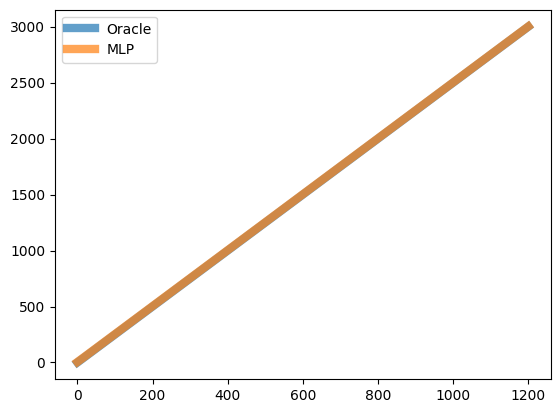

In [16]:
# Create a list of values of X over its observed range
all_x = [i for i in range(1201)]

# Create a list of each x value's oracle estimate
oracle_preds = [linear(x) for x in all_x]

# Create a list of what our MLP would predict for those same values
mlp_preds = mlp.predict(np.array(all_x).reshape(-1,1))

# Plot the oracle estimates
plt.plot(all_x, oracle_preds, alpha=0.7, lw=6, label="Oracle")

# Plot our MLP's estimates
plt.plot(all_x, mlp_preds, alpha=0.7, lw=6, label="MLP")

# Add a lengend
plt.legend()
plt.show()

Wait, shouldn't there be two lines? There are, you just can't see them because they're overlapping! In other words, I would say our neural network basically solved this problem.

## Predicting DS2

However, dataset 1 had a very simple structure to it. What happens when we turn our neural network towards a more difficult task: predicting dataset 2?

Since we know the underlying pattern is more complicated, I'm now going to create a neural network with three layers of size 200, 100, and 50 (respectively).

In [17]:
mlp = sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(200,100,50),
                                           random_state=8675309)

mlp.fit(df2_train[['X']], df2_train.Y)

predictions = mlp.predict(df2_test[['X']])

print(sklearn.metrics.mean_absolute_error(df2_test.Y, predictions))

661.4636138798821


So the mean average error from our predictions is quite a bit larger than it was for dataset 1. That might reflect, however, differences in the presence of noise or random variation in selecting the test set. To get a better sense of how this compares to predicting DS1, we should compare the $S_{MAE}$ scores instead of the raw MAEs.

**QUESTION (!!)**: What is the $S_{MAE}$ score for this neural network? How does it compare to this score for the neural network predicting DS1?

$S_{MAE} = \frac{Baseline-Achieved}{Baseline-Oracle}$

$S_{MAE} = \frac{661.4636138798821}{162.112}$

$S_{MAE} = 4.0803\% $

This means that our neural network only made up $4.08\%$ of the difference between the oracle and our baseline. While this is an increase, it is not as substantial as that in DS1, which should make us question whether a neural network is needed in this case as we are trading a large level of interpretability for a marginal increase in performance.

In [18]:
661.4636138798821/162.112

4.080287787948345

Finally, let's go ahead and go through the same plotting exercise we did before.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


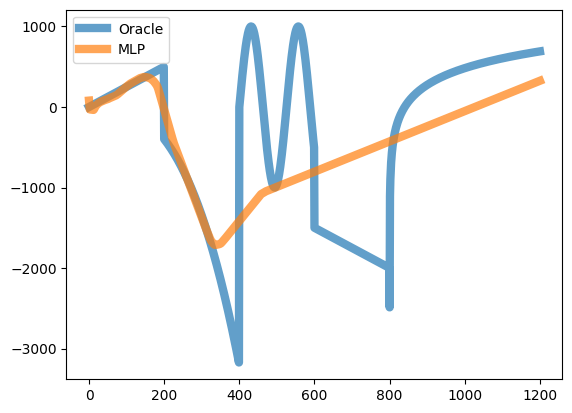

In [19]:
# Create a list of values of X over its observed range
all_x = [i for i in range(1201)]

# Create a list of each x value's oracle estimate
oracle_preds = [cray(x) for x in all_x]

# Create a list of what our MLP would predict for those same values
mlp_preds = mlp.predict(np.array(all_x).reshape(-1,1))

# Plot the oracle estimates
plt.plot(all_x, oracle_preds, alpha=0.7, lw=6, label="Oracle")

# Plot our MLP's estimates
plt.plot(all_x, mlp_preds, alpha=0.7, lw=6, label="MLP")

# Add a lengend
plt.legend()
plt.show()

It looks like our neural network actually does quite well for low values of x (< 300), but then the relationship gets too complicated for the neural network to figure out. Reducing the noise (to make for a cleaner/clearer signal for the MLP to pick up on) or increasing the number of observations (to give the nural network more opportunities to learn the pattern) might have produced more accurate estimates.

## Predicting DS3
Now, we'll predict the binary outcome in dataset 3. To do this, we'll use the [Scikit Learn implementation of a MLP Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier).

In the first line below, we initialize our neural network. Again, we're specifying just one of the hyperprameters associated with the model (the number and size of hidden layers), using the defaults otherwise, and specifying a random seed for reproduceability. In the second line, like before, we train the algorithm on the training data. In the third line, we produce predictions of the outcomes for the test set based on its feature values. In the last line, we evaluate how well the algorithm did by calculating the predictions' accuracy.

In [20]:
mlp = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100,50),
                                           random_state=8675309)

mlp.fit(df3_train[['X1','X2']], df3_train.Y)

predictions = mlp.predict(df3_test[['X1','X2']])

print(sklearn.metrics.accuracy_score(df3_test.Y, predictions))

0.926


Looks like we did pretty good here! (Recall that the maximum possible value was 0.945 from above). Just as we did above, let's calculate our achieved accuracy relative to what is possible (the oracle accuracy) and what is trivial (the baseline accuracy):

$S_{Acc} = \frac{Achieved-Baseline}{Oracle-Baseline} = \frac{0.353}{0.38} = 0.929$

Note that $S_{Acc}$ is a little different than $S_{MAE}$, since a higher accuracy is preferred whereas a lower MAE is preferred.

So, our algorithm improved on the baseline 93% as much as the oracle predictions did.

Let's graph our results and see if we can learn anything else from them...

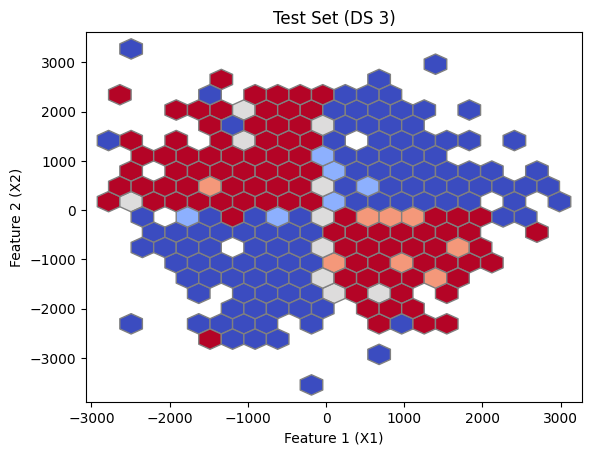

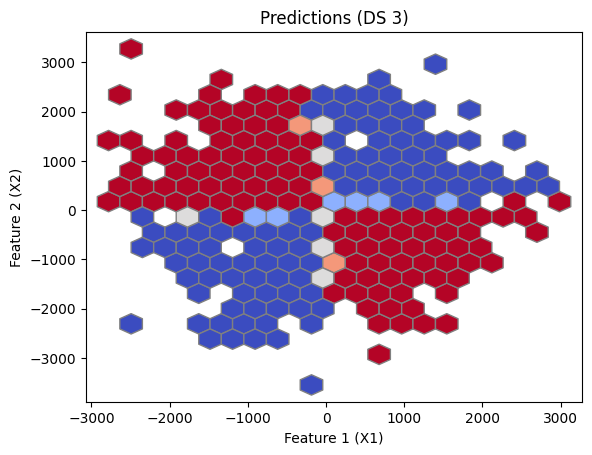

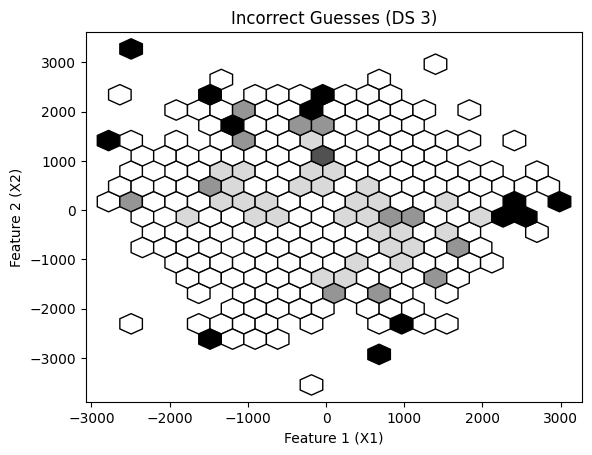

In [21]:
# Let's plot the actual test data first...

plt.hexbin(df3_test.X1, df3_test.X2, C=df3_test.Y, gridsize=20,
           reduce_C_function=np.mean,
           bins=5, cmap="coolwarm", edgecolor="grey")
#Add labels
plt.xlabel("Feature 1 (X1)")
plt.ylabel("Feature 2 (X2)")
plt.title("Test Set (DS 3)")

plt.show()

# Then let's plot the predictions from our NN

plt.hexbin(df3_test.X1, df3_test.X2, C=predictions, gridsize=20,
           reduce_C_function=np.mean,
           bins=5, cmap="coolwarm", edgecolor="grey")
#Add labels
plt.xlabel("Feature 1 (X1)")
plt.ylabel("Feature 2 (X2)")
plt.title("Predictions (DS 3)")

plt.show()

# And finally, let's create a measure of when our NN was wrong and plot that...

# For each prediction and associated actual value...
wrong = []
for pred, real in zip(df3_test.Y, predictions):
    # Calculate how "off" our prediction was (absolute difference)
    wrong.append(abs(real-pred))

# And plot it (notice we're changing 'cmap' to make darker areas where we were
# wrong)
plt.hexbin(df3_test.X1, df3_test.X2, C=wrong, gridsize=20,
           reduce_C_function=np.mean,
           bins=5, cmap="Greys", edgecolor="black")
#Add labels
plt.xlabel("Feature 1 (X1)")
plt.ylabel("Feature 2 (X2)")
plt.title("Incorrect Guesses (DS 3)")

plt.show()

To me, it looks like our neural network did a pretty good job of approximating the data generation process, which we should expect given the high accuracy score. There was one cluster of errors near the top. This might be solved with more data or through regularization.

Note that we could have also plotted the oracle predictions, which could be helpful. We'll do this when we predict using random forests.

## Predicting DS4

Pretty much the same thing, but predicting the outcome in the more complicated binary dataset (i.e., dataset 4).

In [22]:
mlp = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(200,100),
                                           random_state=8675309)

mlp.fit(df4_train[['X1','X2']], df4_train.Y)

predictions = mlp.predict(df4_test[['X1','X2']])

print(sklearn.metrics.accuracy_score(df4_test.Y, predictions))

0.656


While this score is bit lower, but the accuracy of our oracle predictions was also a bit lower (0.794)...

**QUESTION (!!)**: How much did this model improve on our baseline model as a proportion of this same value for the oracle predictions (i.e., what is its $S_{Acc}$ score)? How does this compare to our neural network-based predictions for dataset 3?

$S_{Acc} = \frac{Achieved-Baseline}{Oracle-Baseline}$

$S_{Acc} = \frac{0.656}{0.794}$

$S_{Acc} = 0.8261964735516373$

This model improved on our baseline $82.62\% $ as much as the oracle did. This is slightly less than the model for DS3.

In [23]:
.656/.794

0.8261964735516373

And then, as before, let's plot our results to see if anything helpful arises...

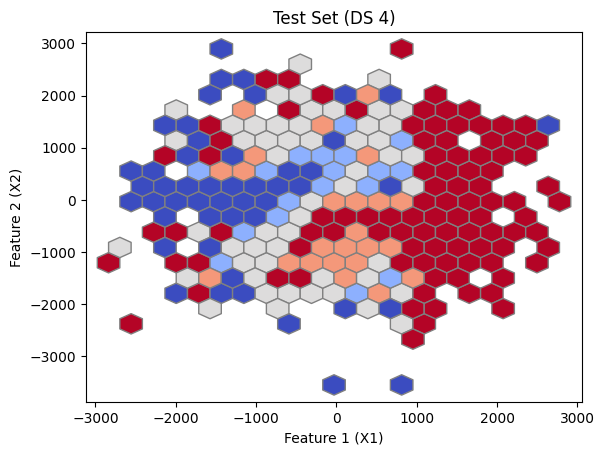

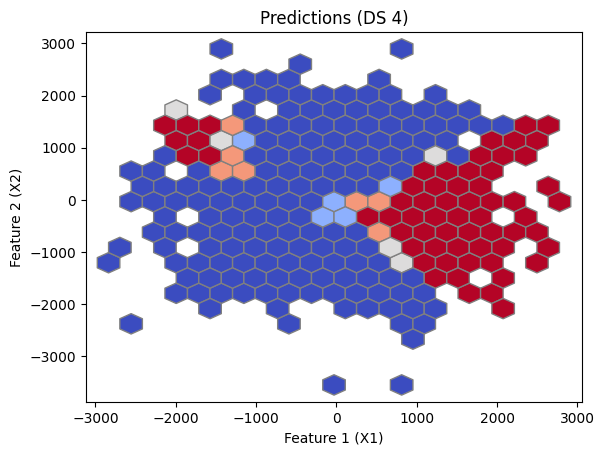

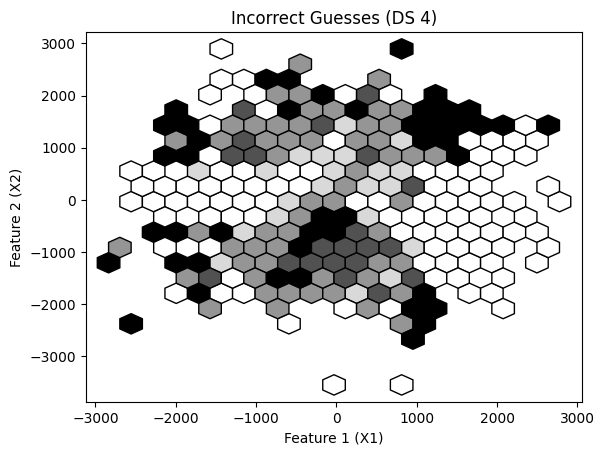

In [24]:
# Let's plot the actual test data first...

plt.hexbin(df4_test.X1, df4_test.X2, C=df4_test.Y, gridsize=20,
           reduce_C_function=np.mean,
           bins=5, cmap="coolwarm", edgecolor="grey")
#Add labels
plt.xlabel("Feature 1 (X1)")
plt.ylabel("Feature 2 (X2)")
plt.title("Test Set (DS 4)")

plt.show()

# Then let's plot the predictions from our NN

plt.hexbin(df4_test.X1, df4_test.X2, C=predictions, gridsize=20,
           reduce_C_function=np.mean,
           bins=5, cmap="coolwarm", edgecolor="grey")
#Add labels
plt.xlabel("Feature 1 (X1)")
plt.ylabel("Feature 2 (X2)")
plt.title("Predictions (DS 4)")

plt.show()

# And finally, let's create a measure of when our NN was wrong and plot that...

#For each prediction and associated actual value...
wrong = []
for pred, real in zip(df4_test.Y, predictions):
    wrong.append(abs(real-pred))

# And plot it (notice we're changing 'cmap' to make darker areas where we were
# wrong)
plt.hexbin(df4_test.X1, df4_test.X2, C=wrong, gridsize=20,
           reduce_C_function=np.mean,
           bins=5, cmap="Greys", edgecolor="black")
#Add labels
plt.xlabel("Feature 1 (X1)")
plt.ylabel("Feature 2 (X2)")
plt.title("Incorrect Guesses (DS 4)")

plt.show()

Looking at the data generation function against these predictions, there are clearly some problem areas where the neural network was not able to learn the patterns in the data generation process. This could potentially be solved with more data, having higher-quality data, or by finding hyperparameter values that better suit the data.

Now that we've trained and tested neural network algorithms on each of our four datasets, let's turn to random forest models.

# Predicting Data with Random Forests

## Some More Information on Random Forests

To really understand random forest models, it's important you understand decision trees well. First, as a review, a trained decision tree might look like this:


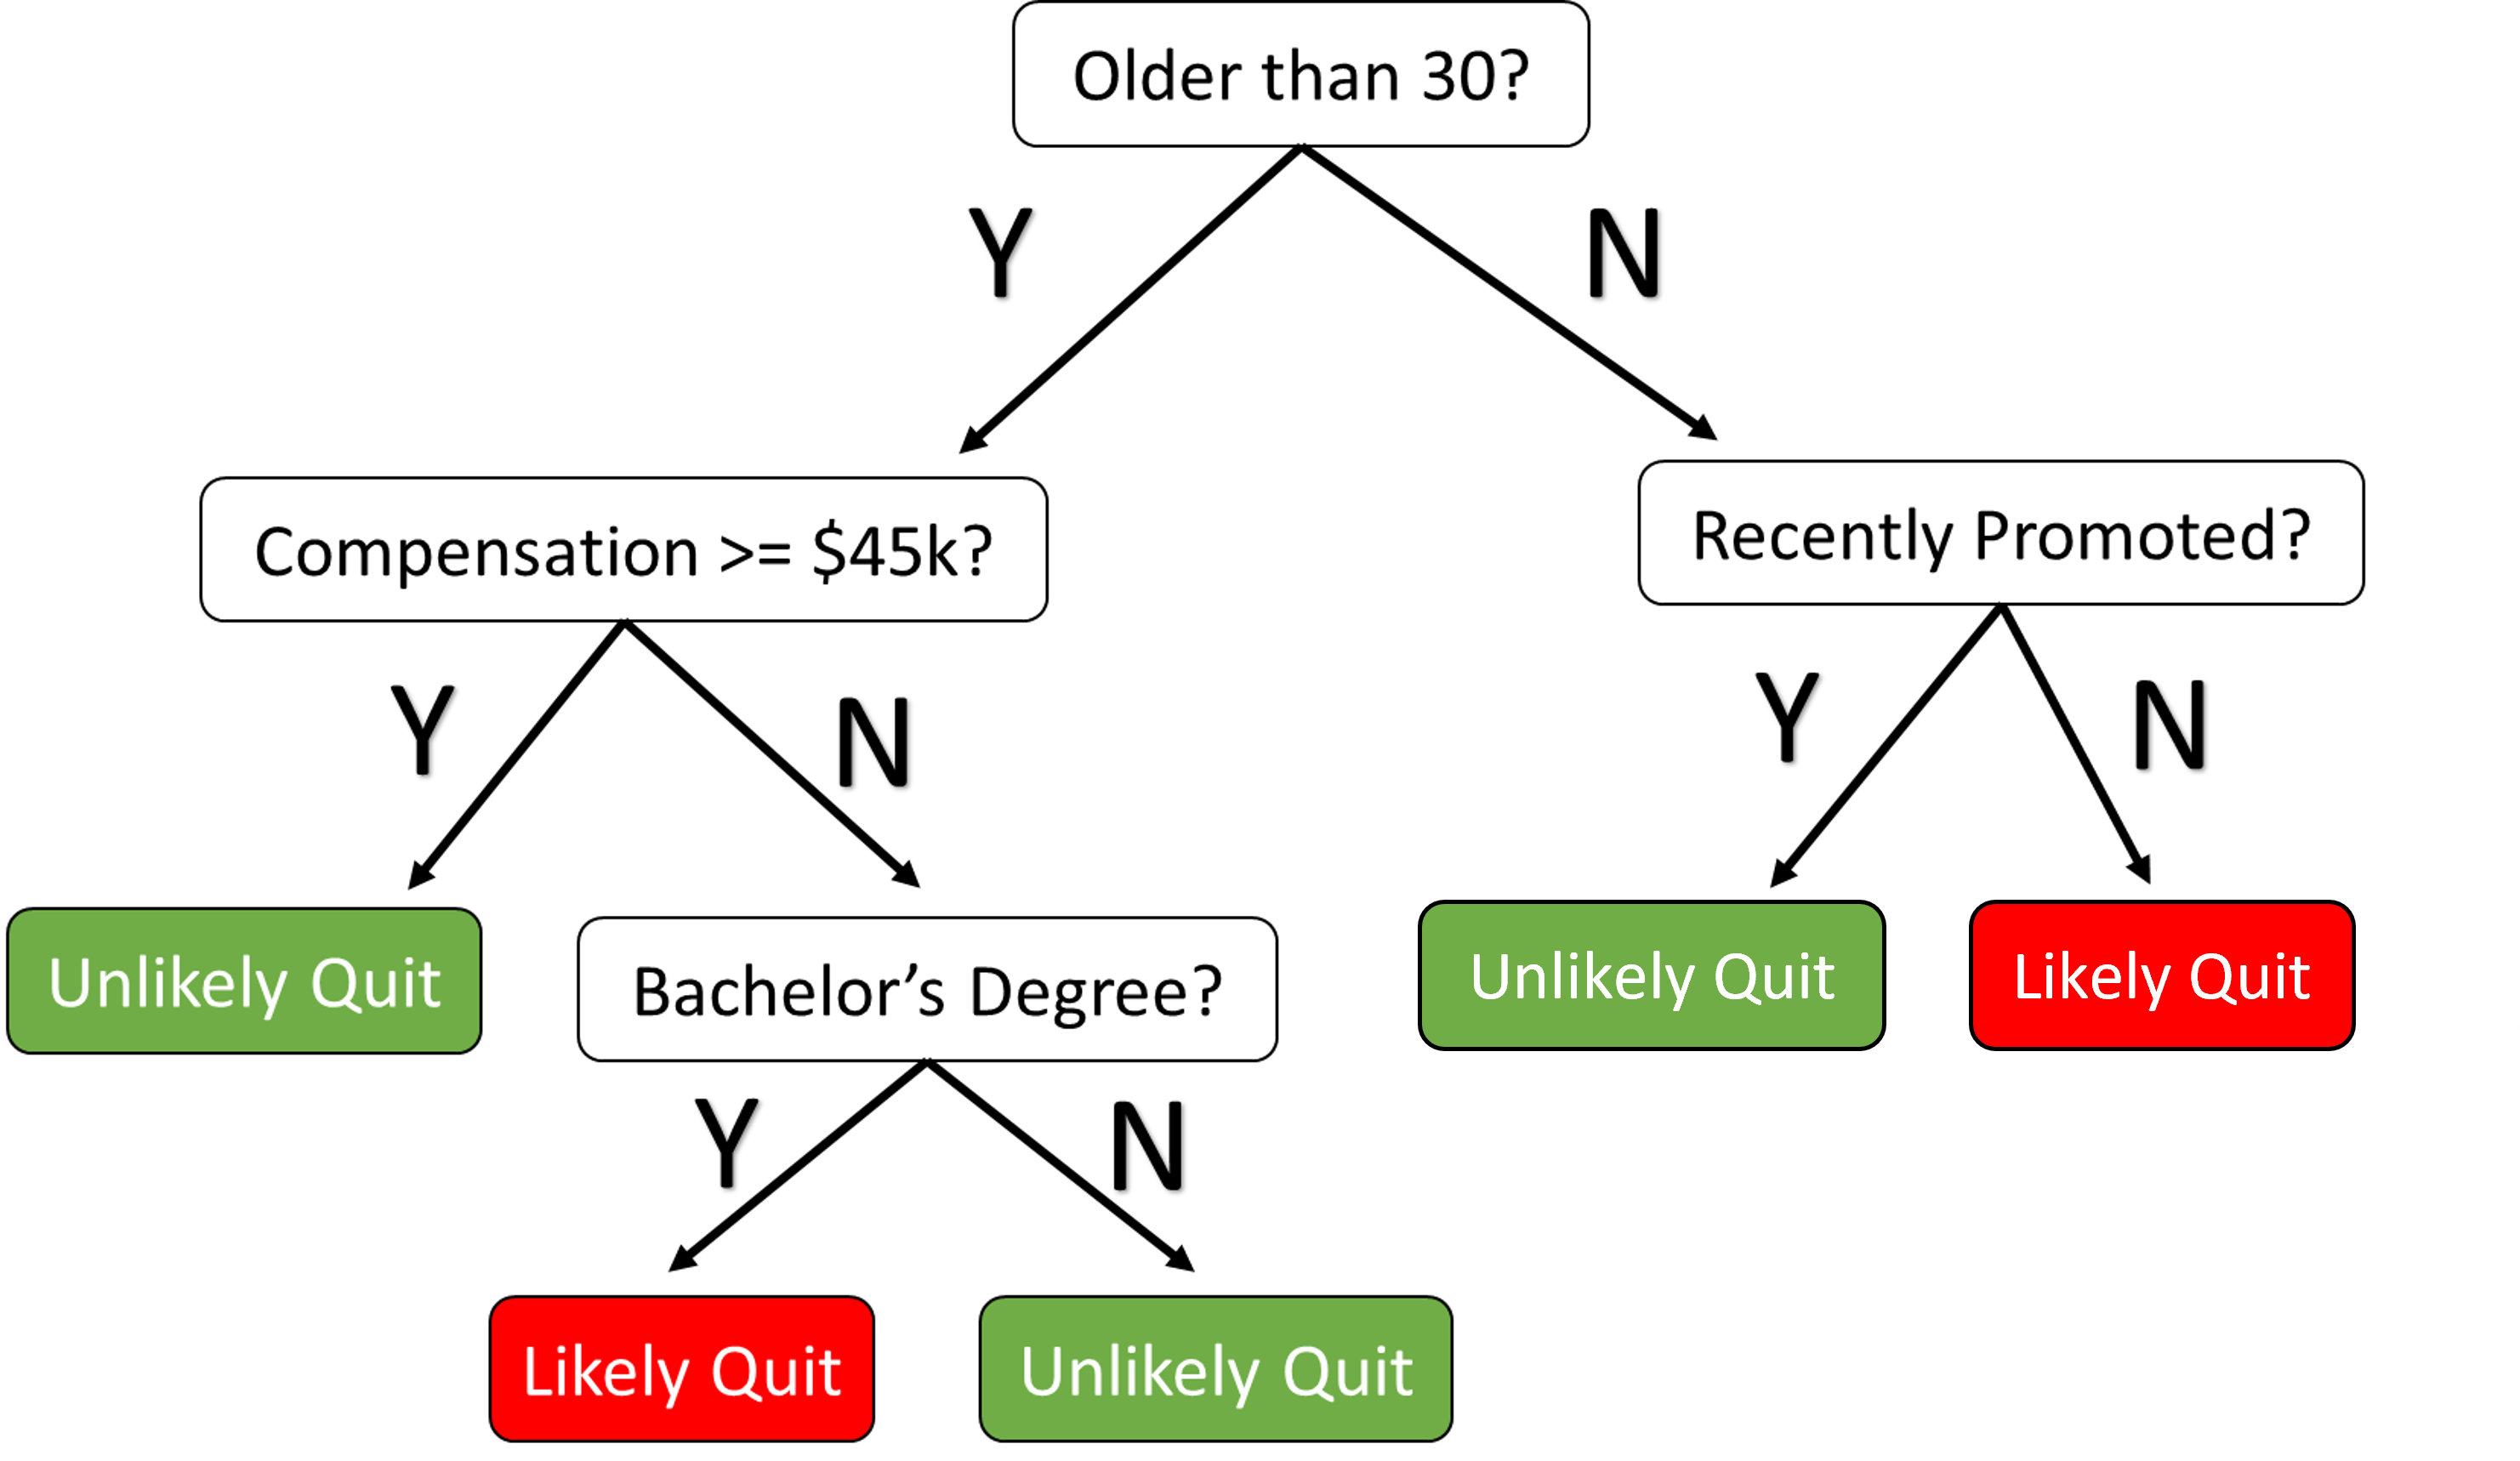

Specifically, this is a classification tree, meaning this is an algorithm for classifying individuals into different categories based on a set of features. In this example, an organization might be interested in which employees are likely to quit during the next year. If this decision tree were trained on their data, then it would suggest two groups of employees are likely to quit:

1.  Emplyees who are older than 30, make less than $45,000 a year, and do have a Bachelor's degree.
2.  Employees who are under 30 and have not received a promotion in the last 3 years.

But how do we take a dataset with information and then train a tree like this one to make accurate predictions?

First, some vocabulary review from class:

*  Node: each box in the diagram
*  Split: the un-colored boxes in the diagram, seperates participants into two groups on the basis of their feture values
*  Root: the top of the "tree", or the first node, or the first split
*  Leaf or terminal node: the colored boxes in the diagram, where a classification is made

Now, to understand how to build a classification tree, let's go through the process of deciding between two potential features to split on when both are binary (i.e., they only take on values of zero or one). To be concrete, let's imagine that in a company dataset we have gender (where everyone in our data identifies as either a man or a woman) and educational attainment (where everyone in our data's highest degree is either a BA or an MA) and we're predicting whether each individual will be rated as a "star employee" by their manager.

So, we have two potential "splits" we could use as the root: "Employee is man?" and "Employee has MA?". To decide which split is better, we'll calculate the following metric for both potential splits where $J$ is the number of classes (for us this is two: "star employee" or not) and $p_{i}$ is the fraction of observations assigned to class $i$ on the basis of the proposed split:

$I = 1 - \sum\limits_{i=1}^{J} p_{i}^{2}$

(NOTE: calculate the average over the two groups produced by a split)

This is the so-called "Gini impurity index", and it's going to serve as a sort of cost function, or thing we'll want to minimize (there are other options, such as [information gain](https://en.wikipedia.org/wiki/Information_gain_in_decision_trees)). This formula is actually amenable to there being any number of classes, but to get an intuitive sense of this cost function, it's worth simplifying this we're in a two-class (i.e., predicting a binary outcome) sitution:

$I = 1 - (p_{y=0}^{2} + p_{y=1}^{2})$

Now, note that $\Sigma_{i=1}^{J} p_{i}=1$ (since all observations belong to one of the two classes). It follows, then, that you can solve for $I$ given either $p_{y=0}$ or $p_{y=1}$, since $1 - p_{i} = p_{j}$. So, given the proportion in either class, $p_{?}$, we can solve for $I$:

$I = 1 - (p_{y=?}^{2} + [1 - p_{y=?}]^{2})$

Given this, we can produce this simple graph of $p_{y=?}$ against $I$, which shows us the cost function (on the y-axis) given the proportion of observations classified into one of the classes (on the x-axis):

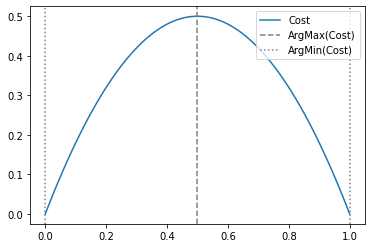

Alright, so now back to our example. We calculate $I$ if we were to split employees on the basis of education and if we were to split them on the basis of gender. We then select the split that has a lower value of $I$ (i.e. better seperates the employees). Let's say that education did a better job at seperating our employees. Now we have our root, which has divided the employees into two groups.

So what happens when there are many different features to select from? There are two points to make here. The first is that the tree continues to split groups ("grow deeper") until either (A) a group has a cost of zero (i.e., the group is perfectly seperated) or (B) it reaches some constraint we place on it. Common constraints are number of splits or a minimum number of observations in a leaf. The second point is that the algorithm always picks the split that minimizes the cost function *for that split*. Importantly, this can be different than what would be the optimal split from the entire tree's perspective. This is what's known as a [greedy algorithm](https://en.wikipedia.org/wiki/Greedy_algorithm). There have been proposals for non-greedy trees, but these are much more computationally expensive (and not typically amenable to ensemble techniques such as AdaBoost or random forests).

Now let's add the complication of continuous features (perhaps age). This is actually fairly straight-forward. Instead of having only one potential split to consider, we consider each possible split of age. So for instance, if we had five employees with ages 18, 20, 22, 22, and 24, we'd consider splitting ages at 19, 21, and 23. Each of these would have their own value for $I$ and would compete with all other available splits.

Finally, what if we have a continuous outcome? This turns out to also be straight-forward: just evaluate splits on a different cost function amenable to continuous outcomes (for instance, the average variance in the outcome for the groups).

Alright, now that you (hopefully) understand trees more fully, we can talk about why we need random forests. Trees have various strenghts, such as being very quick to train and fitting to data very well, but also have severe weaknesses, such as not generlizing to new data very well (this ends up being precisely because they fit so well to existing data). This combination of strengths and weaknesses make it an ideal candidate for ensemble methods. The idea behind ensembles is to create groups of individual learners (e.g., decision trees) that work together, ultimately performing better than any individual learner.

The random forest is an algorithm that is probably the simplest of ensembles, and it typically far out-performs decision trees. The approach is as follows:

1. Take $K$ random samples of $n$ observations (with replacement) from the $N$ observations in the training data
2. For each sample $K_{i}$, train a decision tree $T_{i}$ on that random sample
3. When making a prediction for the value of an outcome in the test set, take an aggregate (typically majority rules for binary outcomes or the average for continuous outcomes) of all $K$ trees' predictions of the observation's outcome.

As you can probably guess, the "best" values for $K$, $n$, and the parameters for $T$ (e.g., how deep each tree should be, which cost function to use) typically depend on the specifics of the dataset and are unknown. Normally we select these values via cross-validation. However, it's generally true that increasing $K$ increases performance but trades off with increased computation time. Sometimes in step (1) we also sample $f$ features (without replacement) from the $F$ features in the dataset, where $f < F$. This is known as "bagging".

## Predicting DS1

Let's see how well a random forest does at predicting outcomes in dataset 1! Since DS1 contains a continuous outcome, we'll use [Scikit Learn's implementation of a random forest regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html). Like before, we'll use mostly the default settings (which are pretty good). The one thing I'll adjust across datasets is the number of trees.

Like before, in the first line we initialize (or "grow") our random forest. In the second line, we train it on our training data. In the third line, we predict the outcome for the observations in our test set. In the next line, we calculate the mean absolute error for our predictions, to quantify how well we predicted the outcomes in the test set. The next rows print the achieved MAE below the cell, calculates $S_{MAE}$, and prints that information as well.

In [25]:
rf = sklearn.ensemble.RandomForestRegressor(n_estimators=250,
                                             random_state=8675309)

rf.fit(df1_train[['X']], df1_train.Y)

preds = rf.predict(df1_test[['X']])

achieved = sklearn.metrics.mean_absolute_error(df1_test.Y, preds)
print("Achieved MAE: {}".format(round(achieved,2)))

baseline = 857.361
oracle = 396.608
s = round((baseline-achieved)/(baseline-oracle),3)
print(r"S: " + str(s))

Achieved MAE: 491.05
S: 0.795


Let's plot out the algorithm's predictions against the oracle predictions... (We'll use a scatterplot for the RF predictions, since they tend to not be very linear).

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


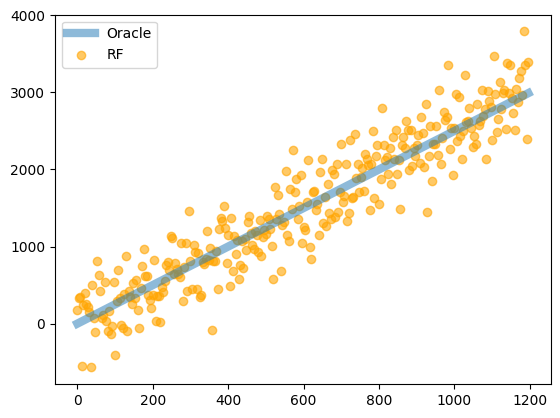

In [26]:
# Create a list of values of X over its observed range
all_x = [i*4 for i in range(300)]

# Create a list of each x value's oracle estimate
oracle_preds = [linear(x) for x in all_x]

# Create a list of what our MLP would predict for those same values
rf_preds =rf.predict(np.array(all_x).reshape(-1,1))

# Plot the oracle estimates
plt.plot(all_x, oracle_preds, alpha=0.5, lw=6, label="Oracle")

# Plot our MLP's estimates
plt.scatter(all_x, rf_preds, alpha=0.6, label="RF", color="orange")

# Add a lengend
plt.legend()
plt.show()

Seems like our algorithm was mistaking noise in the data for structure. This might have prevented if (A) we had more training data, (B) we regularized the trees in the random forest more, or (C) if we had more trees grown in the forest.

## Predicting DS2

Now let's repeat that same procedure, but predict the outcome in dataset 2.

In [27]:
rf = sklearn.ensemble.RandomForestRegressor(n_estimators=250,
                                             random_state=8675309)

rf.fit(df2_train[['X']], df2_train.Y)

preds = rf.predict(df2_test[['X']])

achieved = sklearn.metrics.mean_absolute_error(df2_test.Y, preds)
print("Achieved MAE: {}".format(round(achieved,2)))

baseline = 903.028
oracle = 162.112
s = round((baseline-achieved)/(baseline-oracle),3)
print(r"S: " + str(s))

Achieved MAE: 196.18
S: 0.954


Looks like this did pretty well! Let's plot the random forest's predictions against the oracle estimates to see what happened...

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


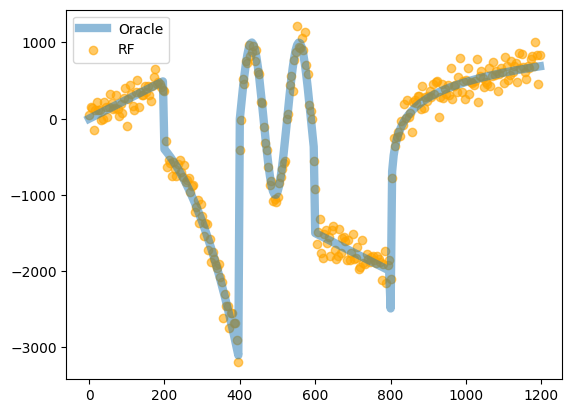

In [28]:
# Create a list of values of X over its observed range
all_x = [i*4 for i in range(300)]

# Create a list of each x value's oracle estimate
oracle_preds = [cray(x) for x in all_x]

# Create a list of what our MLP would predict for those same values
rf_preds =rf.predict(np.array(all_x).reshape(-1,1))

# Plot the oracle estimates
plt.plot(all_x, oracle_preds, alpha=0.5, lw=6, label="Oracle")

# Plot our MLP's estimates
plt.scatter(all_x, rf_preds, alpha=0.6, label="RF", color="orange")

# Add a lengend
plt.legend()
plt.show()

## Predicting DS3

Now we'll predict the outcome in our two binary datasets. For that, we'll use [Scikit Learn's implementation of a random forest classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). Besides that, the procedure will be very similar to before.

In [29]:
rf = sklearn.ensemble.RandomForestClassifier(n_estimators=250,
                                             random_state=8675309)

rf.fit(df3_train[['X1','X2']], df3_train.Y)

predictions = rf.predict(df3_test[['X1','X2']])

achieved = sklearn.metrics.accuracy_score(df3_test.Y, predictions)
print("Achieved accuracy: {}".format(round(achieved,2)))

baseline = 0.567
oracle = 0.947
s = round((achieved-baseline)/(oracle-baseline),3)
print(r"S: " + str(s))

Achieved accuracy: 0.94
S: 0.992


Now, for visualizing these results, I'll produce three graphs. The first will be, for a whole bunch of different coordinates in the (X1, X2) space, what the oracle estimate is. In the second graph, I'll show what our random forest model would predict for all of those same points. Finally, I'll produce a graph that shows us where the oracle and random forest predictions diverge.

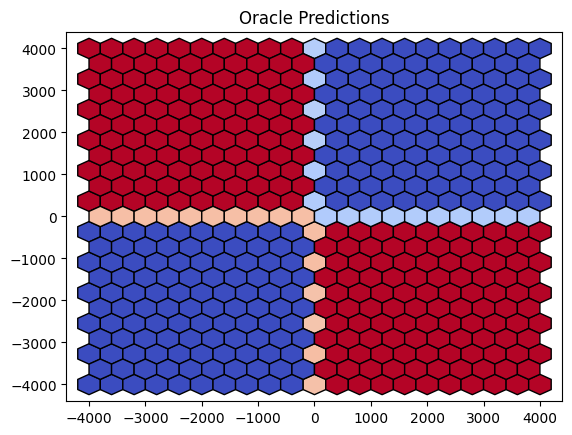

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


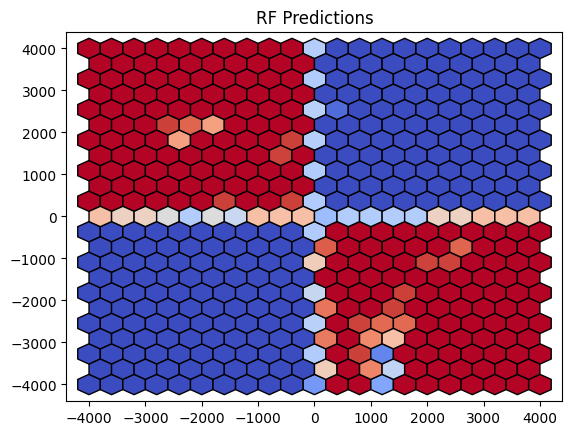

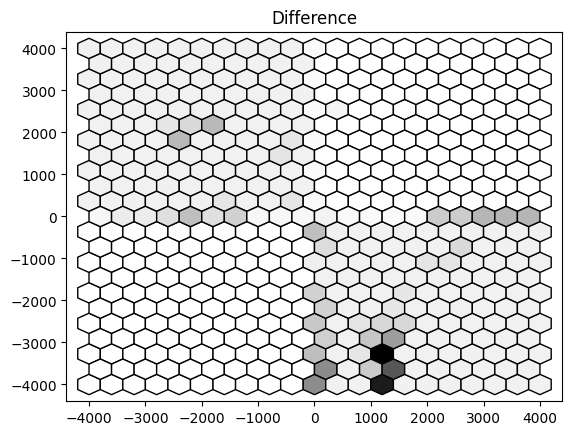

In [30]:
# Create the coordinate space and calculate oracle predictions while we're at it

X1 = []
X2 = []
oracle = []

for x1, x2 in itertools.product([i for i in range(-4000,4001,100)],
                                [i for i in range(-4000,4001,100)]):
  X1.append(x1)
  X2.append(x2)
  oracle.append(simple(x1,x2))

# First graph...
plt.hexbin(X1, X2, C=oracle, reduce_C_function=np.mean, edgecolors="black",
           cmap="coolwarm",gridsize=20)

plt.title("Oracle Predictions")

plt.show()

# Calculate the RF estimates over the space
rf_preds = rf.predict(np.array([X1,X2]).T)

# Second graph...
plt.hexbin(X1, X2, C=rf_preds, reduce_C_function=np.mean, edgecolors="black",
           cmap="coolwarm",gridsize=20)

plt.title("RF Predictions")

plt.show()

# Calculate where the oracle and RF estimates differ
diff = abs(rf_preds - oracle)

# Third graph...
plt.hexbin(X1, X2, C=diff, reduce_C_function=np.mean, edgecolors="black",
           cmap="Greys",gridsize=20)

plt.title("Difference")

plt.show()

Again, it looks like our decision tree did a pretty good job of figuring out the patterns in the data. However, I would guess the algorithm over-fit to some stray observations in the cluster of disagreement at the bottom. This could potentially be solves by regularizing the trees more.

## Predicting DS4

Now let's repeat the procedure for dataset 4.

In [31]:
rf = sklearn.ensemble.RandomForestClassifier(n_estimators=250,
                                             random_state=8675309)

rf.fit(df4_train[['X1','X2']], df4_train.Y)

predictions = rf.predict(df4_test[['X1','X2']])

achieved = sklearn.metrics.accuracy_score(df4_test.Y, predictions)
print("Achieved accuracy: {}".format(round(achieved,2)))

baseline = 0.527
oracle = 0.794
s = round((achieved-baseline)/(oracle-baseline),3)
print(r"S: " + str(s))

Achieved accuracy: 0.77
S: 0.91


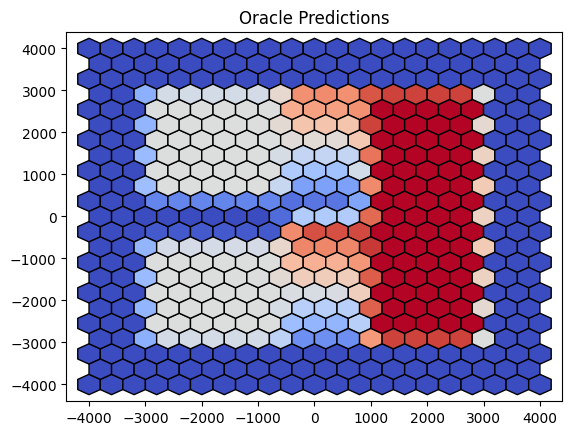

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


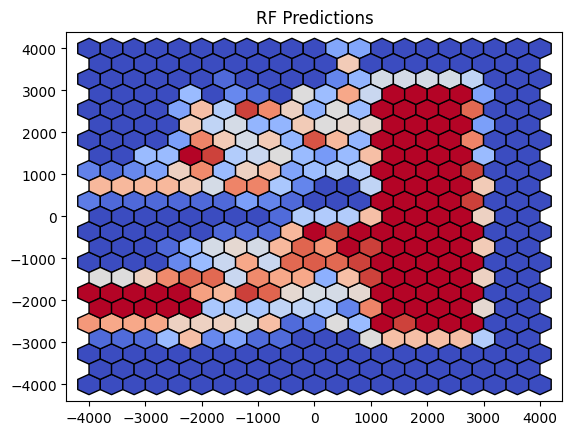

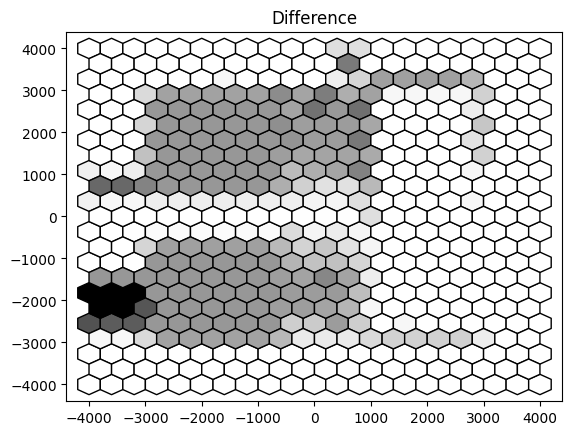

In [32]:
X1 = []
X2 = []
oracle = []

for x1, x2 in itertools.product([i for i in range(-4000,4001,100)],
                                [i for i in range(-4000,4001,100)]):
  X1.append(x1)
  X2.append(x2)
  oracle.append(complex2D(x1,x2))

plt.hexbin(X1, X2, C=oracle, reduce_C_function=np.mean, edgecolors="black",
           cmap="coolwarm",gridsize=20)

plt.title("Oracle Predictions")

plt.show()

rf_preds = rf.predict(np.array([X1,X2]).T)

plt.hexbin(X1, X2, C=rf_preds, reduce_C_function=np.mean, edgecolors="black",
           cmap="coolwarm",gridsize=20)

plt.title("RF Predictions")

plt.show()

diff = abs(rf_preds - oracle)

plt.hexbin(X1, X2, C=diff, reduce_C_function=np.mean, edgecolors="black",
           cmap="Greys",gridsize=20)

plt.title("Difference")

plt.show()

**QUESTION (!!)**: For each of the four datasets, which performed better: the neural network or the random forest? Looking at the structure of each, why might that be?

**DS1:** The neural network performed better; this is probably because DS1 has a simple structure with added noise. Neural networks do a better job at identifying noise than random forests.

**DS2:** The random forest performed better; this is the case because the data has rigid intervals that correlate with the outcome variable, which decision trees (and random forests) are very good at modeling.

**DS3:** The neural network and the random forest performed very similarly. This is probably because the data is visually simple and has very distinct boundaries.  

**DS4:** Neither work especially well. The random forest has a higher accuracy than the neural network ($77\% > 65.6\%$). This is probably because DS4 has a lot of noise added and doesn't have as explicit boundaries as the other datasets.

**QUESTION (!!)**: Using $S$ as a metric, which dataset did each algorithm (neural network, random forest) perform the best on?

**DS1:**

$S_{neural network} = 99.96\% $

$S_{random forest} =  79.5\% $

Based on $S$ as a metric, the neural network improved more from the baseline on the oracle.

**DS2:**

$S_{neural network} = 4.08\% $

$S_{random forest} = 95.4\% $

Based on $S$ as a metric, the random forest improved more from the baseline on the oracle.

**DS3:**

$S_{neural network} = 92.9\% $

$S_{random forest} = 99.2\% $

Based on $S$ as a metric, the random forest improved more from the baseline on the oracle.

**DS4:**

$S_{neural network} = 82.62\% $

$S_{random forest} = 91\% $

Based on $S$ as a metric, the random forest improved more from the baseline on the oracle.


# Some issues to be aware of

I wanted to make some brief notes about common errors people make when they start machine learning.

(Feel free to skip these if you're not interested)

## Predicting Outside Your Data

You should be wary making predictions that have more extreme feature values than those in your data. So, for instance, if we were predicting height from weight and we had a dataset where observations were mostly between 80 pounds and 250 pounds, you should be wary making predictions for folks that weigh less than 80 pounds or more than 250 pounds. There are a couple reasons for this.

First, algorithms like neural networks, because they make non-linear predictions, can make really wild guesses when they see data they have never seen before. This will typically not be as much of a problem for methods like linear/penalized regression (which will tend to make reasonable guesses by extrapolating a linear pattern) and random forests (who will tend to make identical guesses with the nearest portion of the covariate space for which it did have data).

The second problem, which might be more intuitive, is that the relationship between real-world variables change drastically at extreme values. For instance, height might be nearly-linearly related to weight at most values, but become decoupled at extremely high values of weight. If your algorithms didn't see extreme values of weight, they wouldn't know that and they will make bad predictions.

So, when you build a predictive algorithm for real-world use, you should be aware of the range (and the common range) of feature values your data was trained on, and be especially wary of predictions outside of it.

## Predicting with Few Observations and Algorithmic Complexity

Ultimately, these algorithms are learning patterns from data. That means that if you don't have a lot of data, the algorithm won't be able to learn complicated patterns. There are tricks to try to deal with this (in computer vision research datasets are often enriched with images that are permuted by, for instance, rotating them), but fundamentally there's no getting around a sparsity of data. The less data you have, the more "simple" the algorithm you should use.

So what makes an algorithm simple? Two things are important. The first is the number of parameters that need to be optimized during training. For instance, a neural network has a number of parameters equal to the number of neurons in the hidden layers plus the number of connections between all neurons. An OLS regression, on the other hand, has the same number of parameters as there are features.

The second factor is how efficiently/accurately those parameters can be optimized. This is tricky to explain without getting into optimization methods and (depending on the algorithm) multivariate calculus, but let's use neural networks and OLS regression as examples. Recall that neural networks rely on backpropogation and "nudging" parameter values in the right direction to get "good enough" values. OLS, on the other hand, has a closed-form solution (i.e., you could, with a paper and pencil, solve for the exactly correct parameter values). This is because of the complexity of their cost functions (as a fun fact, the cost function of OLS was actually selected over another totally reasonable [and debatably better] cost function because it was easier to calculate). One issue that can arise is that with complicated cost functions (especially when you have small amounts of data) you can end up in what's called a *local minimum*, or a set of parameter values that seems like it's optimal to your algorithm but actually isn't.

# Gathering Data

As a last exercise, I wanted to show you all what it looks like to download real-world data from the web and work with it. There's a lot of data out there that's freely available, but because there is so much out there it can be kind of overwhelming. So I'm going to show two sources of data: (A) Scikit Learn's "Toy Datasets" and (2) my GitHub page, where I've uploaded a couple of easy-to-use datasets.

## Scikit Learn's "Toy Datasets"

Scikit learn makes several ["toy datasets"](https://scikit-learn.org/stable/datasets/toy_dataset.html) freely avilable and easy to download. Unfortunately, the documentation for these datasets aren't amazing. However, they're all pretty famous and a ton of information can be found about them online. I'm going to specifically use the ["Iris Dataset"](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris), which contains taxonomic and physical characteristics of 150 iris flowers (find out more [here](https://archive.ics.uci.edu/ml/datasets/iris)).

One interesting thing to note about this dataset is that each observation could be one of three different classes (i.e. there are three different kinds of iris in the data). Lucily, Scikit Learn's implementations of both an MLP classifier and a RF classifier can handle this and we won't need to change our code at all.

In [33]:
# This line loads  bunch of information about the dataset and then extracts
# just the features from it

iris = sklearn.datasets.load_iris(as_frame=True).data
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [34]:
# Next, we'll add the "target" (or the outcome) to the data

iris['Y'] = sklearn.datasets.load_iris(as_frame=True).target
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [35]:
# Now we'll shuffle the data
iris = iris.sample(frac=1, replace=False, random_state=8675309)

# And then split it into a training set (N=125) and a test set (N=25)
iris_train = iris.head(125)
iris_test = iris.tail(25)

In [36]:
# Now let's initialize a random forest model...
rf = sklearn.ensemble.RandomForestClassifier(n_estimators=500,
                                             random_state=8675309)

# ...train it on our training data...
rf.fit(iris_train[['sepal length (cm)', 'sepal width (cm)',
                   'petal length (cm)','petal width (cm)']],
       iris_train.Y)

# ...predict the test data...
preds = rf.predict(iris_test[['sepal length (cm)', 'sepal width (cm)',
                   'petal length (cm)','petal width (cm)']])

# ...and evaluate how we did!
print(sklearn.metrics.accuracy_score(iris_test.Y, preds))


0.96


So our random forest was able to correctly classify 96% of the iris flowers in the test set! In other words, out of 25 flowers in the test set (and three different categories each might have belonged to), we only mis-classified one.

## Austin's GitHub

[GitHub](https://en.wikipedia.org/wiki/GitHub) is an online repository for files and computer code. Folks use it to make programs and algorithms they develop freely available to anyone who cares to find it (you can also create private repositories and share them only with select folks).

On [my GitHub](https://github.com/AustinVL) I have replication packages for research I've done, materials for talks I've given, and some other stuff. I've also compiled a couple of datasets that are easy to use for machine learning.

When you go into my [PeopleAnalytics_ML_Datasets](https://github.com/AustinVL/PeopleAnalytics_ML_Datasets) repository, you'll find a couple different datasets. Here's some information on each.

### Heart: Predicting whether a patient has heart disease

This dataset contains information on a group of anonymous patients. Specifically, it has various pieces of biomedical information about them (see below) and whether or not they had heart disease (see [here](https://archive.ics.uci.edu/ml/datasets/heart+disease) for more information). The outcome was originally one of severity, but there's not really enough variation in the original data to predict all the different classes so it's easier to reduce heart disease to a binary outcome. Here's the data I've included:

* **age**: age of the patient, in years
* **sex**: equal to one if the patient was assigned male, zero if the patient was assigned female (it is unclear if they were going off gender identity or what biological sex the patient was categorized as at birth)
* **cp**: whether/what kind of chest pain the patient was complaining of (0 = no chest pain, 1 = typical angina, 2 = atypical angin, 3 = non-anginal)
* **trestbps**: the patient's resting blood pressure
* **chol**: the patient's cholestoral level
* **fbs**: whether the patient exhibited high levels of (fasting) blood sugar
* **restecg**: whether the patient exhibited abnormal electrocardiogram (ecg) results
* **thalach**: patient's maximum measured heart rate
* **target**: whether the patient was found to have heart disease


### America Divided: Predicting Americans' immigration attitudes and/or affective polarization

This is a dataset I collected through [Prolific](https://www.prolific.co/about) in early 2022. We asked a lot of questions about politics, party identification, and other matters. This is a set of variables that should be easy and interesting to work with. The sample is comprised entirely of residents of the (continental) U.S. who identified either as a Democrat or as a Republican, in about equal proportion. Here is the information provided:

* **partyID**: whether the participant identified as a strong Democrat (1), a "not strong" Democrat (2), a "not strong" Republican (3), or a strong Republican (4).
* **ideology**: where the participant identified on a 7-point political ideology scale from "Extremely conservative" (1) to "Extremely liberal" (7).
* **region**: whether the participant reported being from (raised in or identifies with) the midwestern (1), northeastern (2), southern (3), or western (4) United States (defined by self-reported state and the [official US census regions](https://en.wikipedia.org/wiki/List_of_regions_of_the_United_States#Census_Bureau-designated_regions_and_divisions)).
* **daca**: whether the participant reported supporting (1) or not supporting (0) the continuation of [DACA](https://en.wikipedia.org/wiki/Deferred_Action_for_Childhood_Arrivals)
* **ap**: the participant's reported level of affective polarization. Specifically, participants reported how warmly they felt towards their political ingroup and outgroup on a 1 (cold) to 100 (warm) scale, and the difference is measured such that higher scores mean participants reported more warm scores towards their political ingroup than their political outgroup.

### Titanic: Predicting who survived the Titanic

This dataset contains information on a collection of passangers aboard [the infamous voyage of the ship The Titanic](https://en.wikipedia.org/wiki/Sinking_of_the_Titanic), including whether they survived the ship's skinking. It contains the following information on each passanger:

* **Survived**: whether the passanger survived the Titanic shipwreck
* **Pclass**: the passanger class of the passanger (1st class folks were rich, 3rd class folks were more poor, and 2nd class folks were in-between).
* **Name**: the name of the passanger
* **Age**: the age of the passanger in years
* **Siblings/Spouses Aboard**: the sum of the number of sibling and spouses of the passanger that were also aboard the ship.
* **Parents/Children Aboard**: the sum of the number of parents and children of the passanger that were also aboard the ship.
* **Fare**: the amount of money paid for the passanger's ticket for the ship
* **Male**: one if the passanger was male and zero if they were female

As an example of how to use these datasets, I'm going to predict whether passangers survived based on the other available characteristics (besides their name, which would be more complicated to incorporate into our prediction task).

In [37]:
# First, we'll use the pandas library to download the csv file directly from my
# GitHub page (click on the file at my GitHub [link above], click on "Raw", and
# copy the URL)

titanic = pd.read_csv('https://raw.githubusercontent.com/AustinVL/PeopleAnalytics_ML_Datasets/main/titanic.csv')

titanic

,Survived,Pclass,Name,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Male
0,0,3,Mr. Owen Harris Braund,22.0,1,0,7.2500,1
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,38.0,1,0,71.2833,0
2,1,3,Miss. Laina Heikkinen,26.0,0,0,7.9250,0
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,35.0,1,0,53.1000,0
4,0,3,Mr. William Henry Allen,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,27.0,0,0,13.0000,1
883,1,1,Miss. Margaret Edith Graham,19.0,0,0,30.0000,0
884,0,3,Miss. Catherine Helen Johnston,7.0,1,2,23.4500,0
885,1,1,Mr. Karl Howell Behr,26.0,0,0,30.0000,1


In [38]:
# Now we'll shuffle the data
titanic = titanic.sample(frac=1, replace=False, random_state=8675309)

# And then split it into a training set (N=125) and a test set (N=25)
titanic_train = titanic.head(800)
titanic_test = titanic.tail(87)

In [39]:
# Now let's initialize a random forest model...
rf = sklearn.ensemble.RandomForestClassifier(n_estimators=500,
                                             random_state=8675309)

# ...train it on a subset of the training data (I dropped name because I didn't
# expect it to be helpful)
rf.fit(titanic_train[['Male','Pclass','Age','Siblings/Spouses Aboard',
                      'Parents/Children Aboard','Fare']],
       titanic_train.Survived)

# ...predict the test data...
preds = rf.predict(titanic_test[['Male','Pclass','Age','Siblings/Spouses Aboard',
                                 'Parents/Children Aboard','Fare']])

# ...and evaluate how we did!
print(sklearn.metrics.accuracy_score(titanic_test.Survived, preds))

0.8390804597701149


# Your turn!

## **Problem 1:** Can complexity be overcome by reducing noise?
In the guided part of this module, we found that our ML algorithms had more difficulty detecting the complicated patterns in datasets 2 and 4. But what if the data was less noisy?

1.   Create a new synthetic dataset that mimics dataset 2 but has one-tenth the amount of noise. (HINT: This will involve changing the "scale" parameter when adding noise to the data)
2.   Divide this new dataset into training (90%) and test (10%) sets
3.   Train an MLP regressor on your training set; evaluate its performance on your test set (provide a quantitative metric of how well your algorithms predicted the test set--you can also optionally produce visualizations akin to what we did in the guided portion of this module).
4.   Train a random forest regressor on your training set; evaluate its performance on your test set (provide a quantitative metric of how well your algorithms predicted the test set--you can also optionally produce visualizations akin to what we did above).
5.   Did reducing noise in the data improve the performance of your algorithm? If not, why don't you think it did? If it did, was this a significant improvement?
6.   Imagine you are a people analyst trying to predict which employees will quit the organization in the next year. What might result in "reducing noise" in this prediction task? In other words, what might change that would make this outcome more predictable?


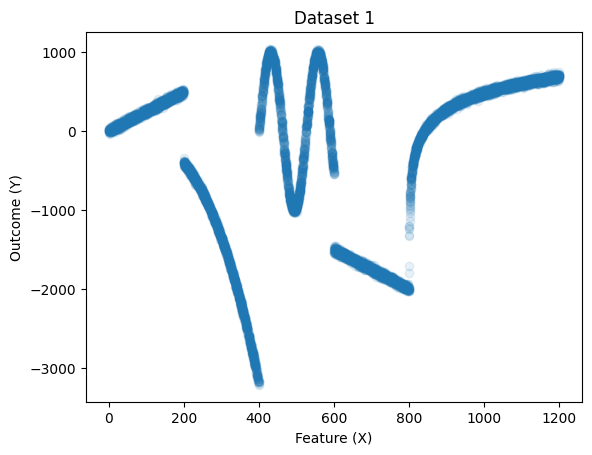

In [40]:
# Enter your code for part one below

# Generate the second dataset...

# Set the random seed (so we all get the same results)
np.random.seed(8675309)

# Generate each observation's feature value at random
X = np.random.random(size=10000) * 1200

# Create the function that deterministically (but crazily) outputs a Y from
# a given X
def cray(x):
  if x < 200:
    return x * 2.5
  elif x < 400:
    return ((-5*x*x*x) + (2*x*x) + (3*x))/100000
  elif x < 600:
    return np.sin((x-400)/20) * 1000
  elif x < 800:
    return x * -2.5
  else:
    return np.log((x-799.99)/40) * 300

# Create a receptacle for our outcome values
Y = []

# For each observation in the dataset...
for x in X:

    # Add structure
    y = cray(x)

    # And then add randomness
    y += np.random.normal(scale=20)

    # Add the outcome value to our dataset
    Y.append(y)

# Combine the feature and outcome values to a single, easy-to-work-with dataset
df2_2 = pd.DataFrame({"X": X, "Y": Y})

# Graph the data (just like before but with df2 as the data source)
plt.scatter('X', 'Y', alpha=0.1, data=df2_2)
plt.xlabel("Feature (X)")
plt.ylabel("Outcome (Y)")
plt.title("Dataset 1")
plt.show()

In [41]:
# Enter your code for part two below

# So we all get the same results
np.random.seed(8675309)

'''
Although all the datasets were generated randomly, we'll first randomly shuffle
the data. In real data, you wouldn't want order in the data (e.g., executives
are listed first in your employement records) to affect your results.
'''

df2_2 = df2_2.sample(frac=1, replace=False)

# Then we'll select what proportion of observations we want to put in our test
# set. This depends on a lot of factors but here we'll pick 10%
p_test = 0.1

'''
Now we'll take the top p_test% of rows for each dataset and put them into a
test set. The bottom 1-p_test% of rows will be put into a training set. In our
case, all the datasets have the same number of rows, but I'll still calcualte
this number seperately for each dataset.
'''


# For dataset 2...
n2 = round(len(df2_2) * p_test)
df2_2_test = df2_2.head(n2)
df2_2_train = df2_2.tail(-n2)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(


871.9557213043005


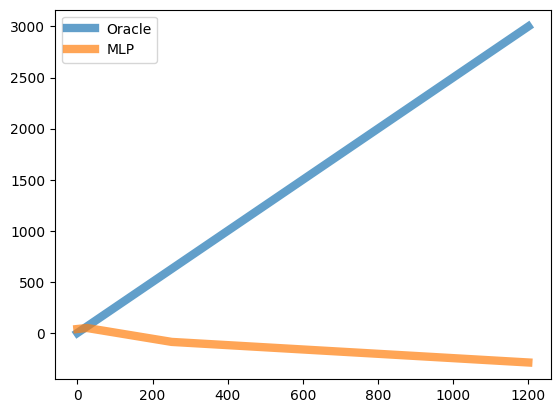

In [42]:
# Enter your code for part three

mlp = sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(10,),
                                           random_state=8675309)

mlp.fit(df2_2_train[['X']], df2_2_train.Y)

predictions = mlp.predict(df2_2_test[['X']])

print(sklearn.metrics.mean_absolute_error(df2_2_test.Y, predictions))

# Create a list of values of X over its observed range
all_x = [i for i in range(1201)]

# Create a list of each x value's oracle estimate
oracle_preds = [linear(x) for x in all_x]

# Create a list of what our MLP would predict for those same values
mlp_preds = mlp.predict(np.array(all_x).reshape(-1,1))

# Plot the oracle estimates
plt.plot(all_x, oracle_preds, alpha=0.7, lw=6, label="Oracle")

# Plot our MLP's estimates
plt.plot(all_x, mlp_preds, alpha=0.7, lw=6, label="MLP")

# Add a lengend
plt.legend()
plt.show()

Achieved MAE: 988.27
S: -0.115


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


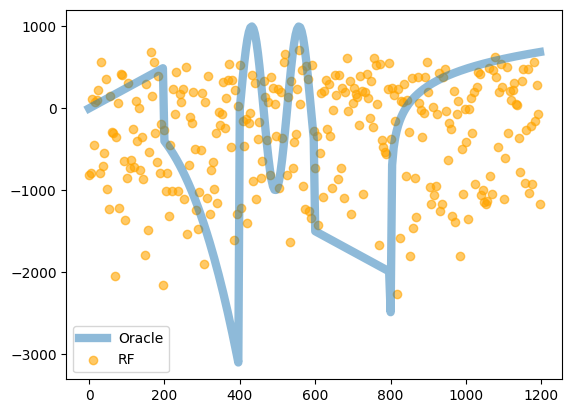

In [43]:
rf = sklearn.ensemble.RandomForestRegressor(n_estimators=250,
                                             random_state=8675309)

rf.fit(df2_train[['X']], df2_2_train.Y)

preds = rf.predict(df2_2_test[['X']])

achieved = sklearn.metrics.mean_absolute_error(df2_2_test.Y, preds)
print("Achieved MAE: {}".format(round(achieved,2)))

baseline = 903.028
oracle = 162.112
s = round((baseline-achieved)/(baseline-oracle),3)
print(r"S: " + str(s))

# Create a list of values of X over its observed range
all_x = [i*4 for i in range(300)]

# Create a list of each x value's oracle estimate
oracle_preds = [cray(x) for x in all_x]

# Create a list of what our MLP would predict for those same values
rf_preds =rf.predict(np.array(all_x).reshape(-1,1))

# Plot the oracle estimates
plt.plot(all_x, oracle_preds, alpha=0.5, lw=6, label="Oracle")

# Plot our MLP's estimates
plt.scatter(all_x, rf_preds, alpha=0.6, label="RF", color="orange")

# Add a lengend
plt.legend()
plt.show()

In [ ]:
# Enter your code for part four below

Double-click to write your response to part five.

Double-click to write your response to part six.

## **Problem 2**: Can complexity be overcome with more data?
In the guided part of this module, we found that our ML algorithms had more difficulty detecting the complicated patterns in datasets 2 and 4. But what if our algorithms had more data?

1.   Create two new synthetic datasets, one that mimics dataset 2 and one that mimics dataset 4, but each with twenty times as many observations. (HINT: This will involve changing the "size" parameter when first generating the data)
2.   Divide each new dataset into training (90%) and test (10%) sets
3.   Train an MLP on each training set (regressor or classifier depending on the dataset); evaluate their performances on your test sets (quantitative metrics of how well your algorithms predicted the test sets--you can also optionally produce visualizations akin to what we did above).
4.   Train a random forest on your training sets (regressor or classifier depending on the dataset); evaluate its performance on your test sets (provide quantitative metrics of how well your algorithms predicted the test sets--you can also optionally produce visualizations akin to what we did above).
5.   Did providing more data improve the performance of your algorithms? If not, why don't you think it did? If it did, was this a significant improvement and how does the improvement to predicting $Y$ in dataset 2 compare to reducing noise in Problem 1 above?
6.  What lessons can we draw from this exercise about the use of ML to solve people problems in organizations with few employees versus organizations with many employees?

In [ ]:
# Enter your code for part one below

In [ ]:
# Enter your code for part two below

In [ ]:
# Enter your code for part three below

In [ ]:
# Enter your code for part four below

Double-click to write your response to part five.

Double-click to write your response to part six.

## **Problem 3**: Explore some other data!

Select another dataset from the SKLearn "Toy Datasets" page and see how well you can predict an outcome of your choosing!

1.    Visit either the [SKLean "Toy Datasets" page](https://scikit-learn.org/stable/datasets/toy_dataset.html) or [my GitHub page](https://github.com/AustinVL), select a dataset, and download it into memory.
2.    Divide it into a training set and a test set (Make sure you have at least 25 observations in your test set).
3.    Train both a neural network and a random forest (regressor or classifier depending on which dataset you pick) on the training set, predict the outcome for the test set, and measure how well they did with a quantitative metric of predictive success (no need to calculate $S$, though, since you're only using one dataset).
4.    Which algorithm performed the best? Any intuitions as to why that algorithm performed the best? Were the differences in performance large?

In [ ]:
# Enter your code for part one below

In [ ]:
# Enter your code for part two below

In [ ]:
# Enter your code for part three below

Double-click to write your response to part four.

# Congratulations on finishing the methods module!

Now, all that's left is **turning in** your work.

To do that, complete the following steps:
1. Click on File > Download > Download .ipynb. You'll then download a file you probably can't open on your computer.
2. Click on File > Print, and then save a .pdf file of work as well.
3. Review the .pdf to make sure it shows that you answered all the questions and completed each part of the problems (even if all your work isn't shown--sometimes the output of code blocks are cut off in the .pdf files).
4. Then, submit both files on Canvas together.

To re-iterate, **YOU SHOULD BE TURNING IN TWO FILES--(1) A .pdf AND (2) A .ipynb**